# import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
%matplotlib inline
pd.set_option('display.max_columns', None)

# import base data

In [2]:
base_data = pd.read_csv('leads.csv')

In [3]:
base_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Cleaning the data

## handle null values

In [4]:
# select in multiple columns means they are null values from the website. so we need to handle this
for x in base_data.columns:
    base_data.loc[base_data[x] == 'Select', x] = np.nan

In [5]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   float64
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   float64
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   float64
 9   Page Views Per Visit                           9103 

In [6]:
base_data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [7]:
# remove the columns which has more than 70% of null values
drop_columns = []
for x in base_data.columns:
    if base_data[x].isnull().mean() > 0.7:
        drop_columns.append(x)

In [8]:
drop_columns

['How did you hear about X Education', 'Lead Profile']

In [9]:
# drop above columns
base_data.drop(columns = drop_columns, inplace = True)

In [10]:
base_data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [11]:
base_data.shape

(9240, 35)

In [12]:
# check nulls in lead quality
base_data['Lead Quality'].value_counts(dropna = False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [13]:
# we can impute the Nan values with Not sure
base_data.loc[base_data['Lead Quality'].isnull(), 'Lead Quality'] = 'Not Sure'

In [14]:
base_data['Lead Quality'].value_counts(dropna = False)

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
base_data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

<AxesSubplot:>

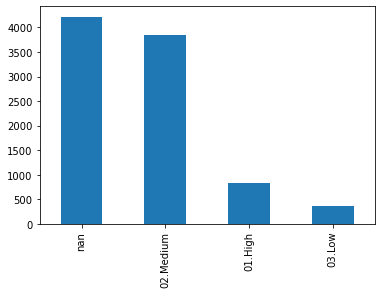

In [16]:
# Asymmetrique Activity Index
base_data['Asymmetrique Activity Index'].value_counts(dropna = False).plot.bar()

<AxesSubplot:>

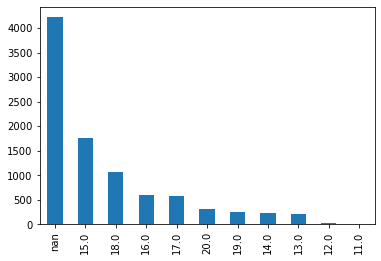

In [17]:
base_data['Asymmetrique Profile Score'].value_counts(dropna = False).plot.bar()

- since we dont know the calculations about this it is better to drop this columns.

In [18]:
# drop columns 
base_data.drop(columns = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                         'Asymmetrique Profile Score'], inplace = True)

In [19]:
base_data.isnull().mean().mul(100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

<AxesSubplot:>

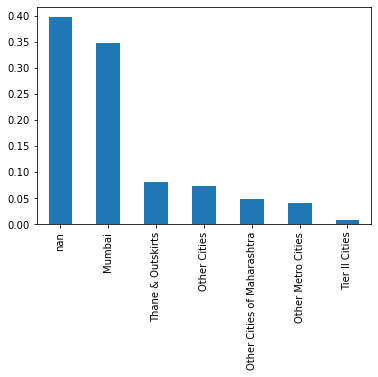

In [20]:
# city
base_data['City'].value_counts(dropna = False, normalize = True).plot.bar()

<AxesSubplot:>

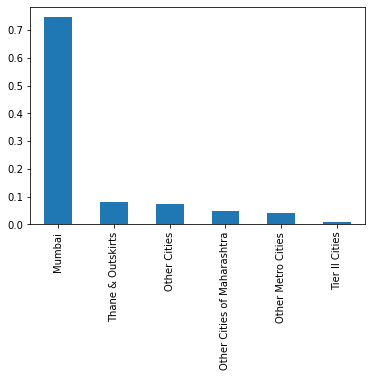

In [21]:
# impute nan's with munmbai as it more leads from mumbai
base_data.loc[base_data.City.isnull(), 'City'] = 'Mumbai'
base_data['City'].value_counts(dropna = False, normalize = True).plot.bar()

<AxesSubplot:>

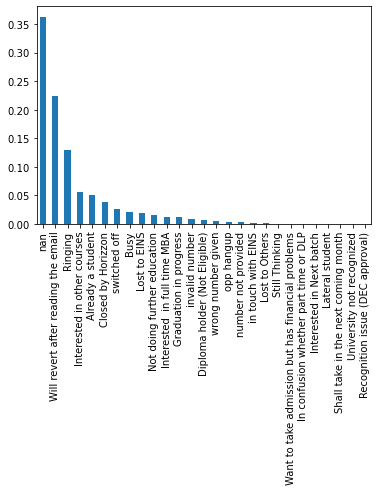

In [22]:
# Tags
base_data['Tags'].value_counts(dropna = False, normalize = True).plot.bar()

<AxesSubplot:>

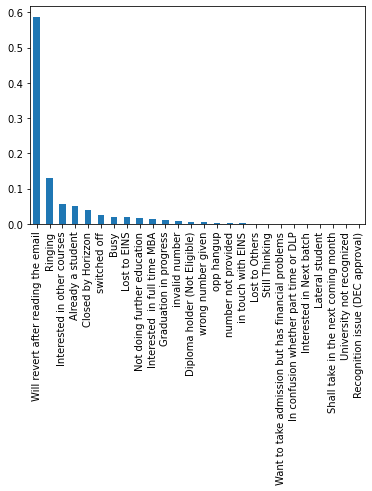

In [23]:
#imput with 'will revert after reading the email'
base_data.loc[base_data.Tags.isnull(), 'Tags'] = 'Will revert after reading the email'
base_data['Tags'].value_counts(dropna = False, normalize = True).plot.bar()

<AxesSubplot:>

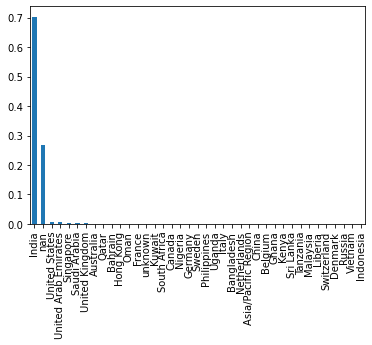

In [24]:
# country column
base_data['Country'].value_counts(dropna = False, normalize = True).plot.bar()


<AxesSubplot:>

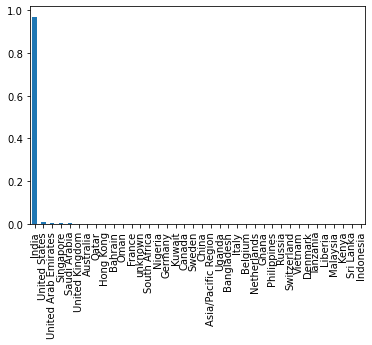

In [25]:
# impute nan's with India
base_data.loc[base_data.Country.isnull(), 'Country'] = 'India'
base_data['Country'].value_counts(dropna = False, normalize = True).plot.bar()

<AxesSubplot:>

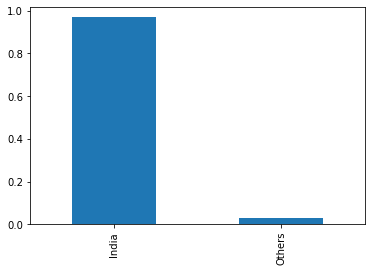

In [26]:
# impute other than india as other
base_data.loc[base_data.Country != 'India', 'Country'] = 'Others'
base_data['Country'].value_counts(dropna = False, normalize = True).plot.bar()

In [27]:
base_data.isnull().mean().mul(100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

<AxesSubplot:>

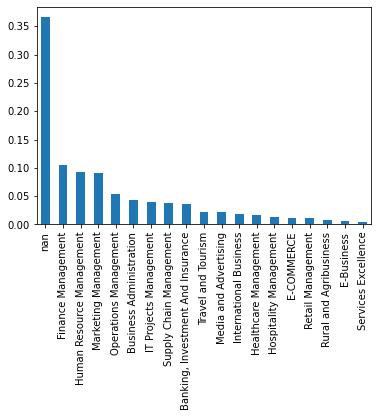

In [28]:
# specialization
base_data['Specialization'].value_counts(dropna = False, normalize = True).plot.bar()

In [29]:
base_data.loc[base_data.Specialization.isnull(), 'Specialization'] = 'Others'

<AxesSubplot:>

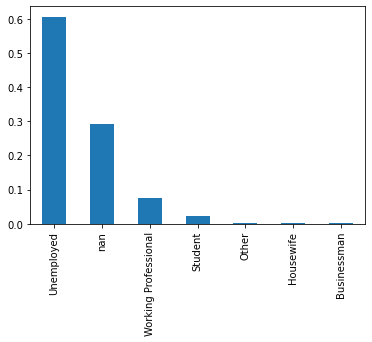

In [30]:
# What is your current occupation
base_data['What is your current occupation'].value_counts(dropna = False, normalize = True).plot.bar()

In [31]:
base_data.loc[base_data['What is your current occupation'].isnull(), 'What is your current occupation'] = 'Other'

<AxesSubplot:>

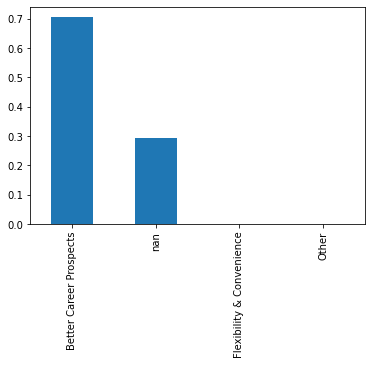

In [32]:
# What matters most to you in choosing a course 
base_data['What matters most to you in choosing a course'].value_counts(dropna = False, normalize = True).plot.bar()

In [33]:
base_data.loc[base_data['What matters most to you in choosing a course'].isnull(),
              'What matters most to you in choosing a course'] = 'Other'

In [34]:
base_data.isnull().mean().mul(100)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [35]:
#drop the 2% of data
base_data = base_data.dropna()
base_data = base_data.reset_index(drop = True)

In [36]:
base_data.isnull().mean().mul(100)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

# Exploratory Data Analysis

In [37]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   float64
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   float64
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   float64
 9   Page Views Per Visit                           9074 

In [38]:
base_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [39]:
# # no use of Prospect ID and Lead Number
base_data.drop(columns = ['Prospect ID','Lead Number'], inplace = True)

In [40]:
base_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [41]:
# remove the columns whose categories are contrinuting above 85%
columns_list = []
for x in base_data.columns:
    if (base_data[x].value_counts(normalize = True).mul(100)[0]) > 95:
        columns_list.append(x)


In [42]:
columns_list

['Do Not Call',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [43]:
base_data.drop(columns = columns_list, inplace = True)

In [44]:
base_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0.0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0.0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0.0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1.0,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,No,Modified


## unvariate analysis

In [45]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Converted                                      9074 non-null   float64
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   float64
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 

In [46]:
base_data.Converted.value_counts()

0.0    5639
1.0    3435
Name: Converted, dtype: int64

Lead Origin


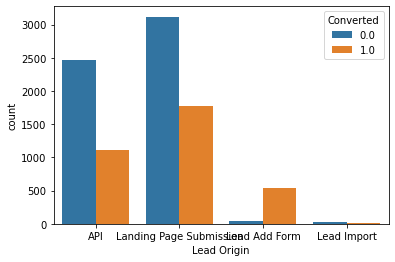

Lead Source


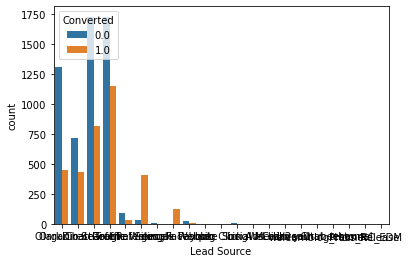

Do Not Email


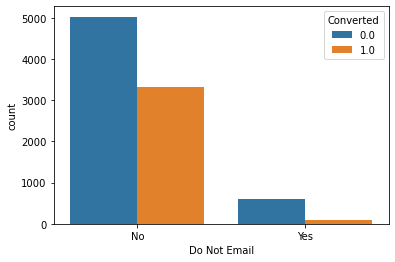

Last Activity


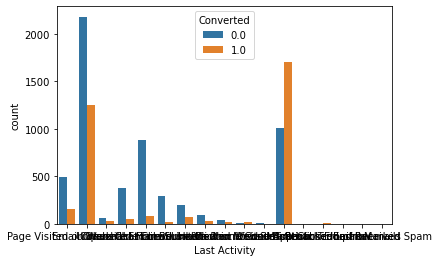

Specialization


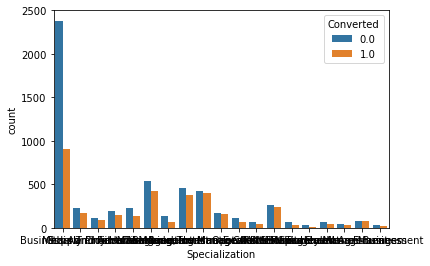

What is your current occupation


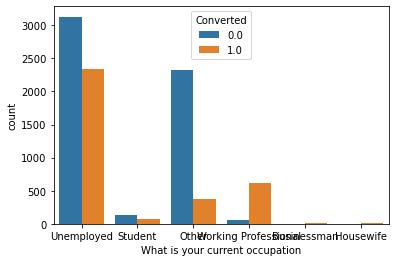

What matters most to you in choosing a course


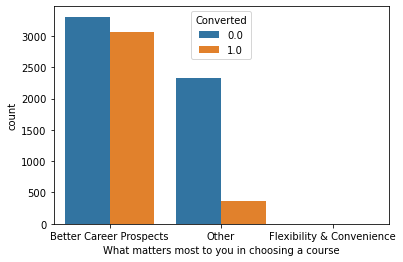

Tags


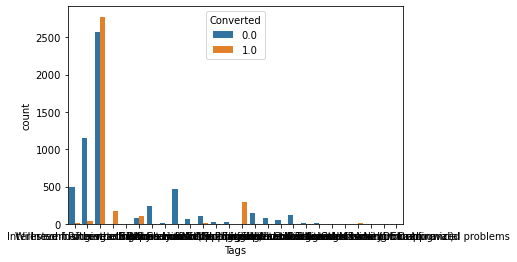

Lead Quality


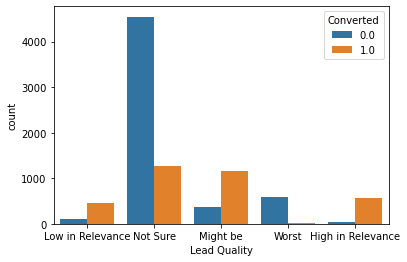

City


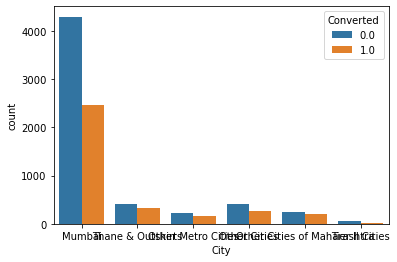

A free copy of Mastering The Interview


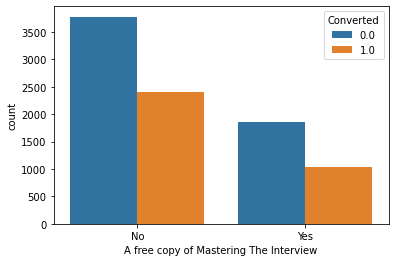

Last Notable Activity


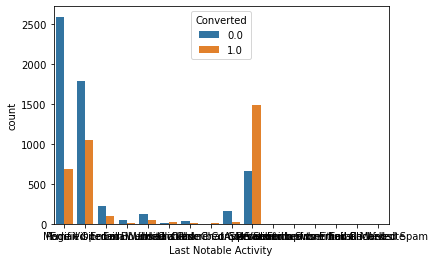

In [47]:
#category columns analysis
for x in base_data.columns:
    if base_data[x].dtype == object:
        print(x)
        sns.countplot(x = x, hue = 'Converted', data = base_data)
        plt.show()

In [48]:
# lead source
base_data['Lead Source'].value_counts()[5:].index
#all this can be marked as other

Index(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'],
      dtype='object')

In [49]:
base_data.loc[base_data['Lead Source'].isin(base_data['Lead Source'].value_counts()[5:].index),
              'Lead Source'] = 'Other_lead_source'

In [50]:
# lead activity
base_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [51]:
base_data.loc[base_data['Last Activity'].isin(base_data['Last Activity'].value_counts()[5:].index),
              'Last Activity'] = 'Other_lead_activity'

In [52]:
# Specialization
base_data['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [53]:
#Tags
base_data['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [54]:
base_data.loc[base_data['Tags'].isin(base_data['Tags'].value_counts()[5:].index),
              'Tags'] = 'Other_Tags'

In [55]:
# Last Notable Activity
base_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [56]:
base_data.loc[base_data['Last Notable Activity'].isin(base_data['Last Notable Activity'].value_counts()[5:].index),
              'Last Notable Activity'] = 'Other_activity'

Lead Origin


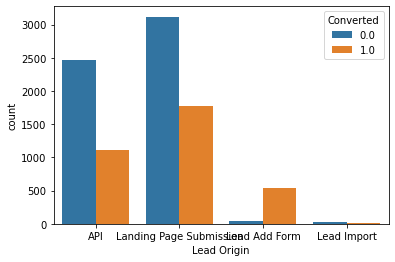

Lead Source


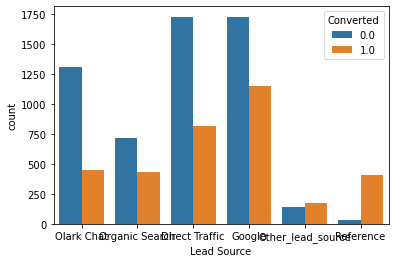

Do Not Email


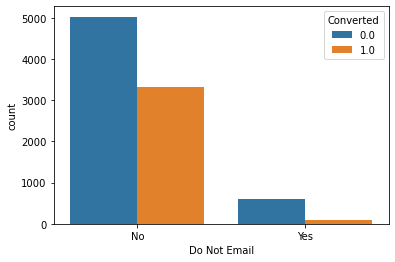

Last Activity


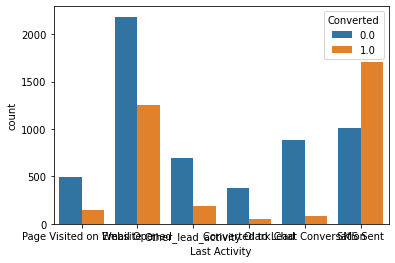

Specialization


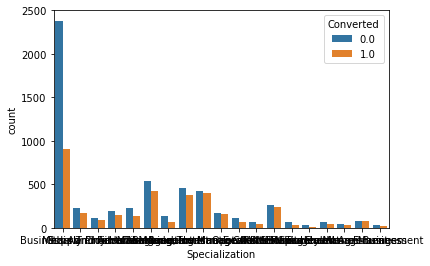

What is your current occupation


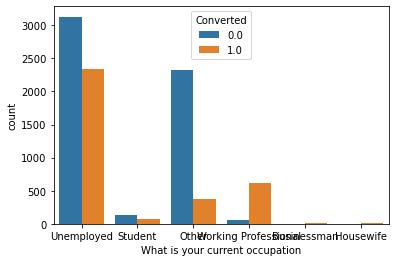

What matters most to you in choosing a course


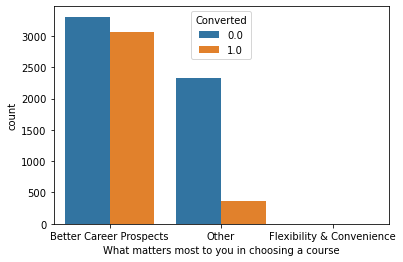

Tags


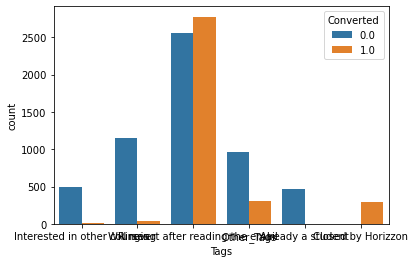

Lead Quality


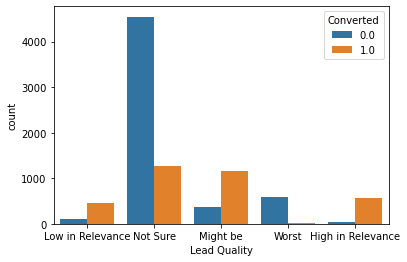

City


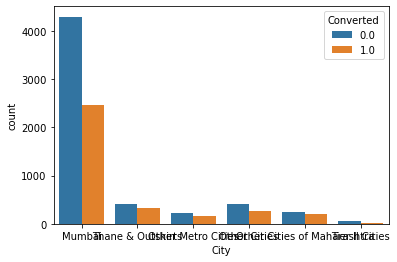

A free copy of Mastering The Interview


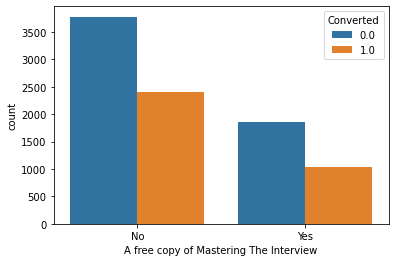

Last Notable Activity


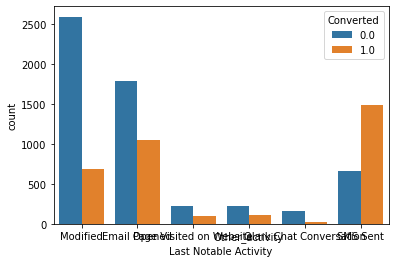

In [57]:
#category columns analysis
for x in base_data.columns:
    if base_data[x].dtype == object:
        print(x)
        sns.countplot(x = x, hue = 'Converted', data = base_data)
        plt.show()

Converted


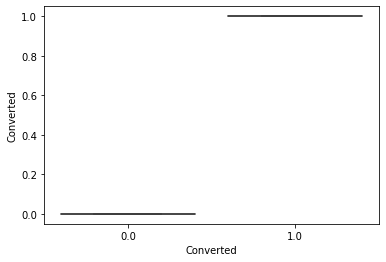

TotalVisits


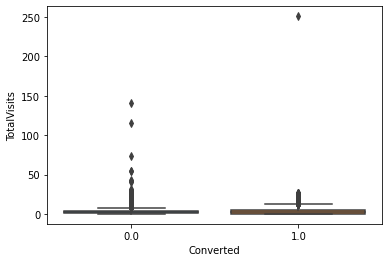

Total Time Spent on Website


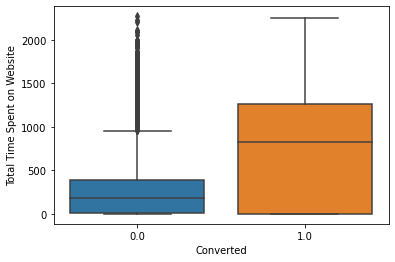

Page Views Per Visit


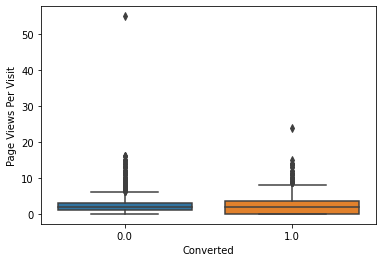

In [58]:
#continuous columns analysis
for x in base_data.columns:
    if base_data[x].dtype != object:
        print(x)
        sns.boxplot(x = 'Converted', y = x ,data = base_data)
        plt.show()

In [59]:
base_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0.0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0.0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0.0,1.0,305.0,1.0,Other_lead_activity,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1.0,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,No,Modified


In [60]:
# removing the Tags columns as it is column which represents what happened after contacted.
base_data.drop(columns = 'Tags', inplace = True)

In [61]:
#change categorical values to numerical
cat_map = {'Yes':1,'No':0}
base_data['Do Not Email'] = base_data['Do Not Email'].map(cat_map)
base_data['A free copy of Mastering The Interview'] = base_data['A free copy of Mastering The Interview'].map(cat_map)

In [62]:
base_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Low in Relevance,Mumbai,0,Modified
1,API,Organic Search,0,0.0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Not Sure,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Might be,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0.0,1.0,305.0,1.0,Other_lead_activity,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1.0,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Might be,Mumbai,0,Modified


## create dummy variables for category columns

In [63]:
base_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [64]:
category_columns = ['Lead Origin', 'Lead Source',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'City', 'Last Notable Activity']

In [65]:
base_data_dummies = pd.get_dummies(base_data[category_columns], drop_first = True)

In [66]:
base_data_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
base_data_dummies.shape, base_data.shape

((9074, 52), (9074, 15))

In [68]:
base_data = pd.concat([base_data, base_data_dummies], axis = 1)

In [69]:
print(base_data.shape)
base_data.head()

(9074, 67)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,Better Career Prospects,Low in Relevance,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0.0,5.0,674.0,2.5,Email Opened,Others,Unemployed,Better Career Prospects,Not Sure,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Might be,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0.0,1.0,305.0,1.0,Other_lead_activity,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1.0,2.0,1428.0,1.0,Converted to Lead,Others,Unemployed,Better Career Prospects,Might be,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [70]:
base_data.drop(columns = category_columns, inplace = True)

In [71]:
base_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.0,5.0,674.0,2.5,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1.0,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1.0,2.0,1428.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


# model building

## Test and train split

In [72]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(base_data, train_size = 0.7, test_size = 0.3, random_state = 70)

In [73]:
df_train.shape, df_test.shape

((6351, 58), (2723, 58))

In [74]:
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5975,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5920,0,0.0,2.0,4.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6754,1,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7523,0,0.0,1.0,87.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7164,0,1.0,3.0,381.0,3.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [75]:
X_train = df_train.drop(columns = 'Converted')
y_train = df_train['Converted']

## scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_columns = ['TotalVisits','Total Time Spent on Website',
       'Page Views Per Visit']
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])

In [77]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5975,0,-0.682408,-0.879188,-1.065590,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5920,0,-0.289018,-0.871800,-0.164171,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6754,1,-0.682408,-0.879188,-1.065590,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7523,0,-0.485713,-0.718508,-0.614881,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7164,0,-0.092324,-0.175520,0.286538,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


## Model-1

In [78]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
logm1.fit().summary()

2023-09-26 22:27:47,252 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,

2023-09-26 22:27:47,253 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,

2023-09-26 22:27:47,778 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2129.9
Date:                Tue, 26 Sep 2023   Deviance:                       4259.7
Time:                        22:27:47   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       2.4124      1.386      1.741      0.082      -0.304       5.129
Do Not Email                                                               -1.0134      0.191     -5.296      0.000      -1.389      -0.638
TotalVisits                                                                 0.2207      0.064      3.462      0.001       0.096       0.346
Total Time Spent on Website                                                 1.0780      0.046     23.574      0.000       0.988       1.168
Page Views Per Visit                                                       -0.1933      0.063     -3.076      0.002      -0.316      -0.070
A free copy of Mastering The Interview                                     -0.0185      0.126     -0.147      0.883      -0.265       0.228
Lead Origin_Landing Page Submission                                        -0.4298      0.158     -2.720      0.007      -0.740      -0.120
Lead Origin_Lead Add Form                                                   5.5724      0.651      8.560      0.000       4.296       6.848
Lead Origin_Lead Import                                                     1.0793      0.698      1.546      0.122      -0.289       2.448
Lead Source_Google                                                          0.2144      0.130      1.645      0.100      -0.041       0.470
Lead Source_Olark Chat                                                      1.3179      0.181      7.264      0.000       0.962       1.674
Lead Source_Organic Search                                                  0.0482      0.149      0.324      0.746      -0.243       0.340
Lead Source_Other_lead_source                                              -0.5696      0.389     -1.465      0.143      -1.332       0.193
Lead Source_Reference                                                      -3.2654      0.700     -4.667      0.000      -4.637      -1.894
Last Activity_Email Opened                                                  0.5478      0.268      2.044      0.041       0.023       1.073
Last Activity_Olark Chat Conversation                                      -0.7103      0.305     -2.330      0.020      -1.308      -0.113
Last Activity_Other_lead_activity                                          -0.0986      0.308     -0.320      0.749      -0.703       0.506
Last Activity_Page Visited on Website                                       0.2449      0.329      0.743      0.457      -0.401       0.891
Last Activity_SMS Sent                                                      1.1950      0.268      4.453      0.000       0.669       1.721
Spe

## feature selection using RFE

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

2023-09-26 22:27:48,217 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "

2023-09-26 22:27:48,299 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



2023-09-26 22:27:49,156 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2023-09-26 22:27:49,230 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

2023-09-26 22:27:50,109 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2023-09-26 22:27:50,278 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Other_lead_source', False, 34),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_lead_activity', False, 39),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 14),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Managemen

In [81]:
req_columns = X_train.columns[rfe.support_]

In [82]:
X_train_rfe = X_train[req_columns]

In [83]:
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified
5975,0,-0.879188,0,1,0,1,0,0,0,1,0,0,1,0,1
5920,0,-0.871800,0,0,0,0,0,0,0,1,0,0,1,0,1
6754,1,-0.879188,0,1,0,0,0,0,0,1,0,0,1,0,1
7523,0,-0.718508,0,0,0,0,0,0,0,1,0,0,1,0,1
7164,0,-0.175520,0,0,0,0,1,0,0,1,0,0,1,0,0


## model-2

In [84]:
logm2 = sm.GLM(y_train, sm.add_constant(X_train_rfe), family = sm.families.Binomial())
logm2.fit().summary()

2023-09-26 22:27:50,987 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2170.9
Date:                Tue, 26 Sep 2023   Deviance:                       4341.8
Time:                        22:27:51   Pearson chi2:                 6.40e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9323      0.224      8.616      0.000       1.493       2.372
Do Not Email                                            -1.0516      0.179     -5.872      0.000      -1.403      -0.701
Total Time Spent on Website                              1.0664      0.044     24.073      0.000       0.980       1.153
Lead Origin_Lead Add Form                                5.1413      0.526      9.775      0.000       4.110       6.172
Lead Source_Olark Chat                                   1.5292      0.116     13.173      0.000       1.302       1.757
Lead Source_Reference                                   -2.5909      0.576     -4.498      0.000      -3.720      -1.462
Last Activity_Olark Chat Conversation                   -0.9580      0.193     -4.972      0.000      -1.336      -0.580
Last Activity_SMS Sent                                   1.2644      0.084     15.026      0.000       1.099       1.429
What is your current occupation_Housewife               21.4094   1.51e+04      0.001      0.999   -2.97e+04    2.97e+04
What is your current occupation_Working Professional     1.8094      0.217      8.349      0.000       1.385       2.234
What matters most to you in choosing a course_Other     -0.5736      0.097     -5.909      0.000      -0.764      -0.383
Lead Quality_Low in Relevance                           -1.0138      0.268     -3.786      0.000      -1.539      -0.489
Lead Quality_Might be                                   -2.1255      0.240     -8.870      0.000      -2.595      -1.656
Lead Quality_Not Sure                                   -3.5709      0.231    -15.488      0.000      -4.023      -3.119
Lead Quality_Worst                                      -5.8643      0.417    -14.075      0.000      -6.681      -5.048
Last Notable Activity_Modified                          -0.7353      0.091     -8.107      0.000      -0.913      -0.558
========================================================================================================================
"""

### VIF

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,4.43
4,Lead Source_Reference,4.40
12,Lead Quality_Not Sure,2.81
9,What matters most to you in choosing a course_...,2.00
14,Last Notable Activity_Modified,1.84
3,Lead Source_Olark Chat,1.77
6,Last Activity_SMS Sent,1.70
11,Lead Quality_Might be,1.68
5,Last Activity_Olark Chat Conversation,1.56
8,What is your current occupation_Working Profes...,1.35


- remove 'What is your current occupation_Housewife' as it has high p value

In [86]:
X_train_rfe.drop(columns = 'What is your current occupation_Housewife', inplace = True)

2023-09-26 22:27:51,163 [79617] WARNING  py.warnings:109: [JupyterRequire] /var/folders/18/cg4ddw0d62x19lx9gj7zktkh0000gn/T/ipykernel_79617/770841402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(columns = 'What is your current occupation_Housewife', inplace = True)



In [87]:
X_train_rfe.shape

(6351, 14)

## model-3

In [88]:
logm3 = sm.GLM(y_train, sm.add_constant(X_train_rfe), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

2023-09-26 22:27:51,176 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2173.1
Date:                Tue, 26 Sep 2023   Deviance:                       4346.3
Time:                        22:27:51   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9313      0.224      8.612      0.000       1.492       2.371
Do Not Email                                            -1.0540      0.179     -5.883      0.000      -1.405      -0.703
Total Time Spent on Website                              1.0659      0.044     24.074      0.000       0.979       1.153
Lead Origin_Lead Add Form                                5.1406      0.526      9.774      0.000       4.110       6.171
Lead Source_Olark Chat                                   1.5270      0.116     13.157      0.000       1.300       1.754
Lead Source_Reference                                   -2.5719      0.576     -4.468      0.000      -3.700      -1.444
Last Activity_Olark Chat Conversation                   -0.9606      0.193     -4.984      0.000      -1.338      -0.583
Last Activity_SMS Sent                                   1.2607      0.084     14.989      0.000       1.096       1.426
What is your current occupation_Working Professional     1.8010      0.217      8.306      0.000       1.376       2.226
What matters most to you in choosing a course_Other     -0.5732      0.097     -5.906      0.000      -0.763      -0.383
Lead Quality_Low in Relevance                           -0.9911      0.268     -3.704      0.000      -1.515      -0.467
Lead Quality_Might be                                   -2.1164      0.240     -8.836      0.000      -2.586      -1.647
Lead Quality_Not Sure                                   -3.5681      0.231    -15.478      0.000      -4.020      -3.116
Lead Quality_Worst                                      -5.8615      0.417    -14.070      0.000      -6.678      -5.045
Last Notable Activity_Modified                          -0.7346      0.091     -8.106      0.000      -0.912      -0.557
========================================================================================================================
"""

In [89]:
res.params

const                                                   1.931290
Do Not Email                                           -1.053984
Total Time Spent on Website                             1.065872
Lead Origin_Lead Add Form                               5.140644
Lead Source_Olark Chat                                  1.527022
Lead Source_Reference                                  -2.571932
Last Activity_Olark Chat Conversation                  -0.960626
Last Activity_SMS Sent                                  1.260701
What is your current occupation_Working Professional    1.801025
What matters most to you in choosing a course_Other    -0.573189
Lead Quality_Low in Relevance                          -0.991060
Lead Quality_Might be                                  -2.116387
Lead Quality_Not Sure                                  -3.568061
Lead Quality_Worst                                     -5.861452
Last Notable Activity_Modified                         -0.734616
dtype: float64

### VIF

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,4.43
4,Lead Source_Reference,4.39
11,Lead Quality_Not Sure,2.81
8,What matters most to you in choosing a course_...,2.00
13,Last Notable Activity_Modified,1.84
3,Lead Source_Olark Chat,1.77
6,Last Activity_SMS Sent,1.70
10,Lead Quality_Might be,1.68
5,Last Activity_Olark Chat Conversation,1.56
7,What is your current occupation_Working Profes...,1.35


- all p values with in limit

## predict the Y - Value

In [91]:
y_train_predict = res.predict(sm.add_constant(X_train_rfe)).values.reshape(-1)

2023-09-26 22:27:51,308 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)



In [92]:
y_train_predict[:10]

array([0.03505072, 0.02035623, 0.03202659, 0.02388308, 0.24299287,
       0.88481856, 0.35647168, 0.99025387, 0.97946458, 0.0750755 ])

In [93]:
y_train_final = pd.DataFrame({'Cust_ID': y_train.index,
                             'Converted': y_train.values,
                             'probability': y_train_predict})

In [94]:
y_train_final.head()

,Cust_ID,Converted,probability
0,5975,0.0,0.035051
1,5920,0.0,0.020356
2,6754,0.0,0.032027
3,7523,0.0,0.023883
4,7164,1.0,0.242993


In [95]:
y_train_final['predicted'] = 0
y_train_final.loc[y_train_final.probability >= 0.5, 'predicted'] = 1

In [96]:
# confusion martric
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_final.Converted, y_train_final.predicted)

In [97]:
confusion

array([[3527,  400],
       [ 564, 1860]])

In [98]:
#accuracy score
metrics.accuracy_score(y_train_final.Converted, y_train_final.predicted)

0.8482128798614391

# Metrics beyound Accuracy

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
#sensitivity or Recall
TP/float(TP+FN)

0.7673267326732673

In [101]:
# Specificity
TN/float(TN+FP)

0.8981410746116628

In [102]:
# Calculate false postive rate - predicting wrong customer as converted
print(FP/ float(TN+FP))

0.10185892538833716


In [103]:
# calculate True positive rate - predicting converted customer as converted
TP/float(TP+FN)

0.7673267326732673

# plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final.Converted, y_train_final.probability, drop_intermediate = False )

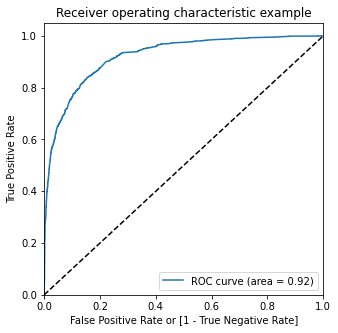

In [106]:
draw_roc(y_train_final.Converted, y_train_final.probability)

# Finding optimal cutoff point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_final[i]= y_train_final.probability.map(lambda x: 1 if x > i else 0)
y_train_final.head()

,Cust_ID,Converted,probability,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,5975,0.0,0.035051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5920,0.0,0.020356,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6754,0.0,0.032027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7523,0.0,0.023883,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7164,1.0,0.242993,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/20 for x in range(20)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Converted, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.381672  1.000000  0.000000
0.05  0.05  0.587152  0.988449  0.339445
0.10  0.10  0.723666  0.969472  0.571938
0.15  0.15  0.768225  0.943894  0.659791
0.20  0.20  0.807117  0.923680  0.735167
0.25  0.25  0.819871  0.903878  0.768016
0.30  0.30  0.834199  0.860149  0.818182
0.35  0.35  0.843017  0.839521  0.845174
0.40  0.40  0.846953  0.814356  0.867074
0.45  0.45  0.848528  0.786304  0.886937
0.50  0.50  0.848213  0.767327  0.898141
0.55  0.55  0.847583  0.744224  0.911383
0.60  0.60  0.839868  0.695132  0.929208
0.65  0.65  0.838293  0.668317  0.943214
0.70  0.70  0.833884  0.636551  0.955691
0.75  0.75  0.824595  0.600248  0.963076
0.80  0.80  0.816407  0.561056  0.974026
0.85  0.85  0.794206  0.490512  0.981665
0.90  0.90  0.770745  0.419142  0.987777
0.95  0.95  0.724453  0.284241  0.996180


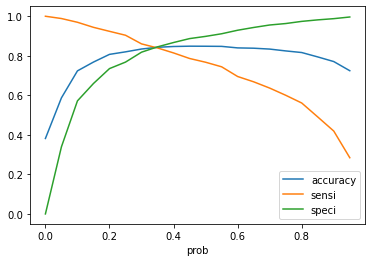

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- looks like 0.35 is ideal cutoff

In [110]:
y_train_final['final_predicted'] = 0
y_train_final.loc[y_train_final.probability >= 0.35, 'final_predicted'] = 1

In [111]:
y_train_final.head()

,Cust_ID,Converted,probability,predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,5975,0.0,0.035051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5920,0.0,0.020356,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6754,0.0,0.032027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7523,0.0,0.023883,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7164,1.0,0.242993,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
y_train_final.Converted.value_counts(normalize = True)

0.0    0.618328
1.0    0.381672
Name: Converted, dtype: float64

In [113]:
y_train_final.final_predicted.value_counts(normalize = True)

0    0.583845
1    0.416155
Name: final_predicted, dtype: float64

In [114]:
confusion_final = metrics.confusion_matrix(y_train_final.Converted, y_train_final.final_predicted)

In [115]:
confusion_final

array([[3319,  608],
       [ 389, 2035]])

In [116]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [140]:
#accuracy score
print('accuracy')
metrics.accuracy_score(y_train_final.Converted, y_train_final.final_predicted)

accuracy


0.8430168477405133

In [118]:
#sensitivity or Recall - Out of all yes how many you got correct
print('sensitivity:') 
print(TP/float(TP+FN))

# Specificity - Out of all No, How many you got correct
print('Specificity:')
print(TN/float(TN+FP))

# Calculate false postive rate - predicting wrong customer as converted
print('FPR:')
print(FP/ float(TN+FP))

# calculate True positive rate - predicting converted customer as converted
print('TPR:')
print(TP/float(TP+FN))

sensitivity:
0.8395214521452146
Specificity:
0.8451744334097275
FPR:
0.15482556659027247
TPR:
0.8395214521452146


# Precision and recall

In [119]:
# Precision - Chances of you predicting 1
print(TP/float(TP+FP))

0.7699583806280742


In [120]:
#recall - Out of all yes how many you got correct
print(TP/float(TP+FN))

0.8395214521452146


In [121]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_final.Converted, y_train_final.final_predicted))
print(recall_score(y_train_final.Converted, y_train_final.final_predicted))


0.7699583806280742
0.8395214521452146


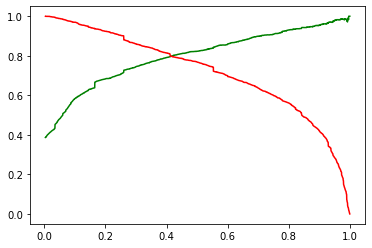

In [122]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_final.Converted, y_train_final.probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# prediction on test set

In [123]:
X_test = df_test.drop(columns = 'Converted')
y_test = df_test['Converted']

In [124]:
scaling_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [125]:
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [126]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_lead_source,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_lead_activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2514,0,0.104371,1.627049,-0.164171,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
830,0,-0.289018,-0.655713,-0.164171,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7871,1,-0.485713,2.696402,-0.614881,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8822,0,-0.289018,-0.821934,-0.164171,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
8216,1,0.104371,-0.759139,0.737247,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [127]:
X_test_rfe = X_test[X_train_rfe.columns]

In [128]:
y_test_predict = res.predict(sm.add_constant(X_test_rfe)).values.reshape(-1)

2023-09-26 22:27:51,923 [79617] WARNING  py.warnings:109: [JupyterRequire] /Users/saisandeep/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)



In [129]:
y_test_final = pd.DataFrame({'Cust_ID': y_test.index,
                             'Converted': y_test.values,
                             'probability': y_test_predict})

In [130]:
y_test_final.head()

,Cust_ID,Converted,probability
0,2514,1.0,0.943205
1,830,0.0,0.051717
2,7871,0.0,0.836845
3,8822,1.0,0.516033
4,8216,0.0,0.029315


In [131]:
y_test_final['final_predicted'] = 0
y_test_final.loc[y_test_final.probability >= 0.35, 'final_predicted'] = 1

In [132]:
y_test_final.head()

,Cust_ID,Converted,probability,final_predicted
0,2514,1.0,0.943205,1
1,830,0.0,0.051717,0
2,7871,0.0,0.836845,1
3,8822,1.0,0.516033,1
4,8216,0.0,0.029315,0


In [139]:
#accuracy score
print('accuracy')
metrics.accuracy_score(y_test_final.Converted, y_test_final.final_predicted)

accuracy


0.8431876606683805

In [134]:
confusion_test_final = metrics.confusion_matrix(y_test_final.Converted, y_test_final.final_predicted)
confusion_test_final

array([[1439,  273],
       [ 154,  857]])

In [135]:
TP = confusion_test_final[1,1] # true positive 
TN = confusion_test_final[0,0] # true negatives
FP = confusion_test_final[0,1] # false positives
FN = confusion_test_final[1,0] # false negatives

In [136]:
#sensitivity or Recall - Out of all yes how many you got correct
print('sensitivity:') 
print(TP/float(TP+FN))

# Specificity - Out of all No, How many you got correct
print('Specificity:')
print(TN/float(TN+FP))

# Calculate false postive rate - predicting wrong customer as converted
print('FPR:')
print(FP/ float(TN+FP))

# calculate True positive rate - predicting converted customer as converted
print('TPR:')
print(TP/float(TP+FN))

sensitivity:
0.847675568743818
Specificity:
0.8405373831775701
FPR:
0.1594626168224299
TPR:
0.847675568743818


In [138]:
# Precision - Chances of you predicting 1
print('Precision')
print(TP/float(TP+FP))

#recall - Out of all yes how many you got correct
print('recall')
print(TP/float(TP+FN))

Precision
0.7584070796460177
recall
0.847675568743818
